In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-collisions-in-nyc/database.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [13]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [15]:
df=pd.read_csv('/kaggle/input/vehicle-collisions-in-nyc/database.csv')
df

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,01/01/2015,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,01/01/2015,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477727,3623371,02/28/2017,9:45,QUEENS,11365.0,40.736010,-73.787415,"(40.73601, -73.787415)",NaN,NaN,...,SPORT UTILITY/STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,ACCELERATOR DEFECTIVE,UNSPECIFIED,NaN,NaN,NaN
477728,3623651,02/28/2017,9:45,QUEENS,11434.0,40.668320,-73.781370,"(40.66832, -73.78137)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
477729,3623667,02/28/2017,9:45,NaN,NaN,40.707077,-73.954025,"(40.707077, -73.954025)",BROADWAY,HOOPER STREET,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,FAILURE TO YIELD RIGHT-OF-WAY,NaN,NaN,NaN,NaN
477730,3623907,02/28/2017,9:53,BRONX,10467.0,40.884342,-73.886765,"(40.884342, -73.886765)",MOSHOLU PARKWAY,WEST GUN HILL ROAD,...,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [16]:
df.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,01/01/2015,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,01/01/2015,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [17]:
df.tail()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
477727,3623371,02/28/2017,9:45,QUEENS,11365.0,40.736010,-73.787415,"(40.73601, -73.787415)",NaN,NaN,...,SPORT UTILITY/STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,ACCELERATOR DEFECTIVE,UNSPECIFIED,NaN,NaN,NaN
477728,3623651,02/28/2017,9:45,QUEENS,11434.0,40.668320,-73.781370,"(40.66832, -73.78137)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
477729,3623667,02/28/2017,9:45,NaN,NaN,40.707077,-73.954025,"(40.707077, -73.954025)",BROADWAY,HOOPER STREET,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,FAILURE TO YIELD RIGHT-OF-WAY,NaN,NaN,NaN,NaN
477730,3623907,02/28/2017,9:53,BRONX,10467.0,40.884342,-73.886765,"(40.884342, -73.886765)",MOSHOLU PARKWAY,WEST GUN HILL ROAD,...,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN
477731,3623313,02/28/2017,9:57,MANHATTAN,10027.0,40.814037,-73.948364,"(40.814037, -73.948364)",NaN,NaN,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,AGGRESSIVE DRIVING/ROAD RAGE,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['UNIQUE KEY', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'PERSONS INJURED', 'PERSONS KILLED',
       'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED', 'MOTORISTS INJURED', 'MOTORISTS KILLED',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE',
       'VEHICLE 5 TYPE', 'VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR',
       'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   UNIQUE KEY           477732 non-null  int64  
 1   DATE                 477732 non-null  object 
 2   TIME                 477732 non-null  object 
 3   BOROUGH              338390 non-null  object 
 4   ZIP CODE             338329 non-null  float64
 5   LATITUDE             356600 non-null  float64
 6   LONGITUDE            356600 non-null  float64
 7   LOCATION             356600 non-null  object 
 8   ON STREET NAME       364552 non-null  object 
 9   CROSS STREET NAME    335574 non-null  object 
 10  OFF STREET NAME      58511 non-null   object 
 11  PERSONS INJURED      477732 non-null  int64  
 12  PERSONS KILLED       477732 non-null  int64  
 13  PEDESTRIANS INJURED  477732 non-null  int64  
 14  PEDESTRIANS KILLED   477732 non-null  int64  
 15  CYCLISTS INJURED 

In [21]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 UNIQUE KEY                  0
DATE                        0
TIME                        0
BOROUGH                139342
ZIP CODE               139403
LATITUDE               121132
LONGITUDE              121132
LOCATION               121132
ON STREET NAME         113180
CROSS STREET NAME      142158
OFF STREET NAME        419221
PERSONS INJURED             0
PERSONS KILLED              0
PEDESTRIANS INJURED         0
PEDESTRIANS KILLED          0
CYCLISTS INJURED            0
CYCLISTS KILLED             0
MOTORISTS INJURED           0
MOTORISTS KILLED            0
VEHICLE 1 TYPE           3955
VEHICLE 2 TYPE          80937
VEHICLE 3 TYPE         447468
VEHICLE 4 TYPE         470901
VEHICLE 5 TYPE         476049
VEHICLE 1 FACTOR         3249
VEHICLE 2 FACTOR        62331
VEHICLE 3 FACTOR       446094
VEHICLE 4 FACTOR       470500
VEHICLE 5 FACTOR       475970
dtype: int64


In [22]:
df_cleaned = df.drop(columns=[
    'OFF STREET NAME',
    'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE', 'VEHICLE 5 TYPE',
    'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR'
])

In [23]:
df_cleaned['BOROUGH'] = df_cleaned['BOROUGH'].fillna('Unknown')

In [24]:
df_cleaned = df_cleaned.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [25]:
df_cleaned['VEHICLE 1 TYPE'] = df_cleaned['VEHICLE 1 TYPE'].fillna('Unknown')
df_cleaned['VEHICLE 2 TYPE'] = df_cleaned['VEHICLE 2 TYPE'].fillna('Unknown')
df_cleaned['VEHICLE 1 FACTOR'] = df_cleaned['VEHICLE 1 FACTOR'].fillna('Unspecified')
df_cleaned['VEHICLE 2 FACTOR'] = df_cleaned['VEHICLE 2 FACTOR'].fillna('Unspecified')

In [26]:
print("Remaining Missing Values:\n", df_cleaned.isnull().sum())

Remaining Missing Values:
 UNIQUE KEY                 0
DATE                       0
TIME                       0
BOROUGH                    0
ZIP CODE               47652
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
ON STREET NAME         78965
CROSS STREET NAME      84441
PERSONS INJURED            0
PERSONS KILLED             0
PEDESTRIANS INJURED        0
PEDESTRIANS KILLED         0
CYCLISTS INJURED           0
CYCLISTS KILLED            0
MOTORISTS INJURED          0
MOTORISTS KILLED           0
VEHICLE 1 TYPE             0
VEHICLE 2 TYPE             0
VEHICLE 1 FACTOR           0
VEHICLE 2 FACTOR           0
dtype: int64


In [30]:
# Convert DATE and TIME
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['HOUR'] = pd.to_datetime(df['TIME'], errors='coerce').dt.hour

/tmp/ipykernel_35/3607993934.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HOUR'] = pd.to_datetime(df['TIME'], errors='coerce').dt.hour


In [31]:
# Add day/night category
df['DAY_NIGHT'] = df['HOUR'].apply(lambda x: 'Night' if (x < 6 or x >= 18) else 'Day')

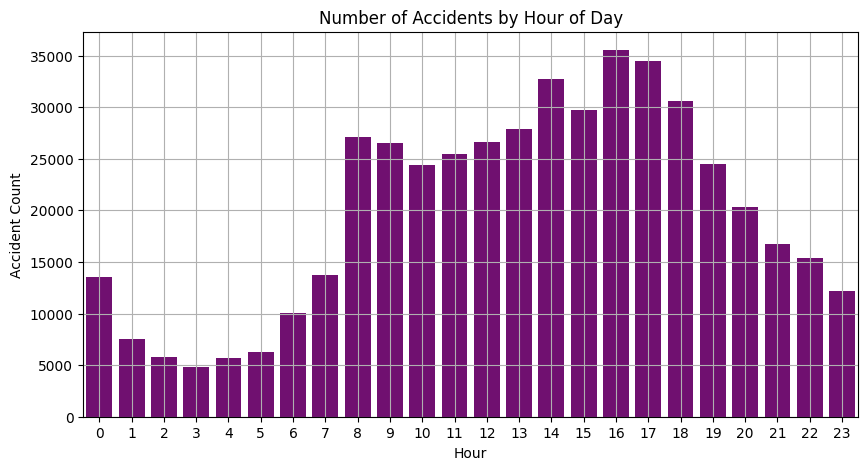

In [32]:
# ACCIDENTS BY TIME OF DAY
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='HOUR', color='purple')
plt.title("Number of Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [35]:
#HEATMAP OF ACCIDENT LOCATIONS
sample_df = df[['LATITUDE', 'LONGITUDE']].dropna().sample(10000)

# Create map
base_map = folium.Map(location=[40.730610, -73.935242], zoom_start=11)
HeatMap(data=sample_df[['LATITUDE', 'LONGITUDE']], radius=8).add_to(base_map)

# Show map
base_map

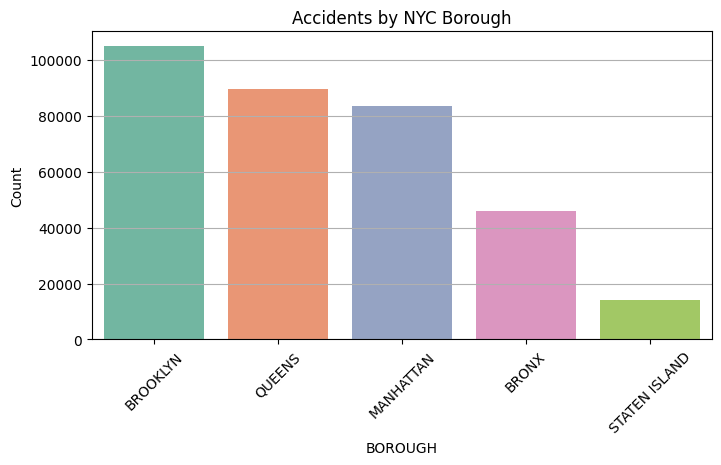

In [36]:
#ACCIDENTS BY BOROUGH
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='BOROUGH', order=df['BOROUGH'].value_counts().index, palette='Set2')
plt.title("Accidents by NYC Borough")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

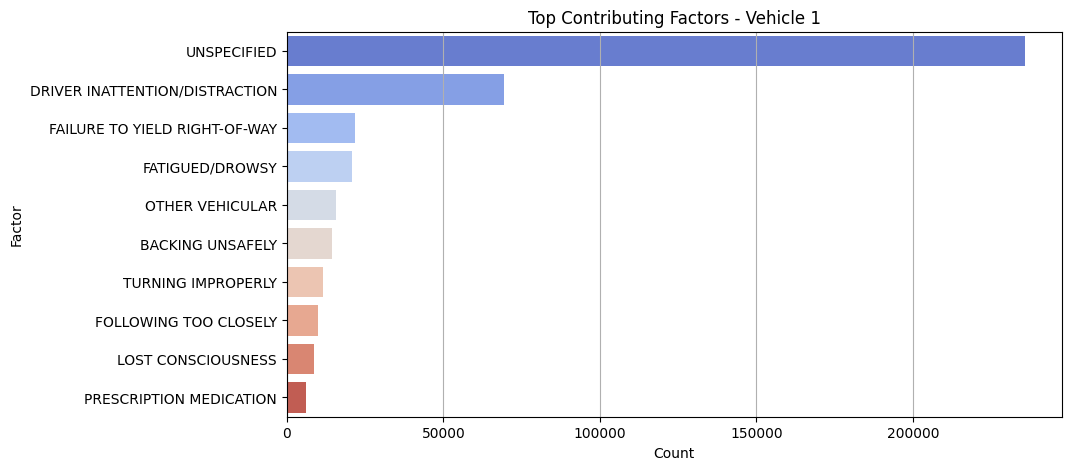

In [37]:
#FACTORS CONTRIBUTING TO COLLISIONS
top_factors = df['VEHICLE 1 FACTOR'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_factors.values, y=top_factors.index, palette='coolwarm')
plt.title("Top Contributing Factors - Vehicle 1")
plt.xlabel("Count")
plt.ylabel("Factor")
plt.grid(axis='x')
plt.show()

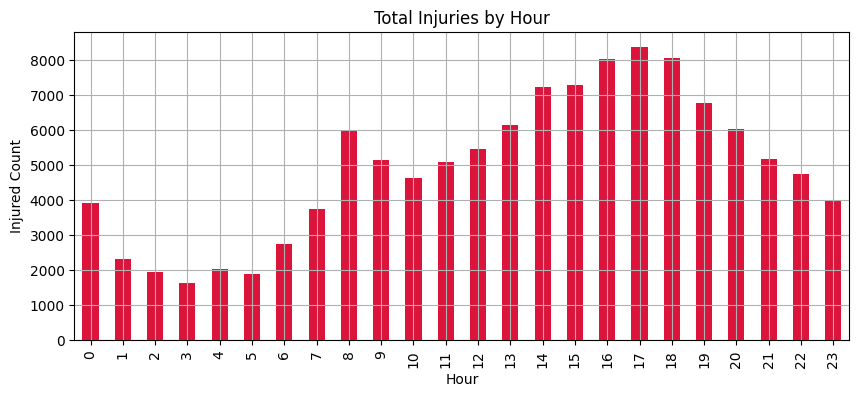

In [38]:
#INJURY SEVERITY BY TIME
injured_by_hour = df.groupby('HOUR')['PERSONS INJURED'].sum()

plt.figure(figsize=(10,4))
injured_by_hour.plot(kind='bar', color='crimson')
plt.title("Total Injuries by Hour")
plt.xlabel("Hour")
plt.ylabel("Injured Count")
plt.grid()
plt.show()